# Mask Tutorial

In this tutorial, we go over the importance of masks, as well as how they are made and used. 

In [1]:
import specpolFlow as pol
import matplotlib.pyplot as plt
import numpy as np

loading specpolFlow package


## 0. What is a Mask?

Analytically, a mask is a function with dirac deltas at wavelengths corresponding to specific spectral line. The amplitude of the dirac delta function corresponds to the line depth. Numerically, a mask is an array of zeros with a depth at the center of each line. Thus, the mask tells us the location and depth of all lines in a spectrum but does not tell us about the shape of the lines of the spectrum as a whole.

## 1. Why do we care?

Given an LSD profile and a mask, we can convolve the LSD profile with the mask to get the spectrum. Typically though, we have the spectrum and a mask but want the LSD profile. This process of going from a spectrum and a line mask to a LSD profile can be done by doing the reverse operation called a deconvolution. We need a mask to help us weigh each spectral line in the spectrum so that they can be averaged together in an LSD.

Note that the hydrogen lines are automatically exluded when `atomsOnly` is `True`. This is done since the hydrogen lines have different shape than all the other lines in the spectrum due to their broad wings.

## 2. Mask Creation

To create a mask we will use the `make_mask` function. The function has the following inputs:
* lineListFile - name of the file containing the line list
* maskFile - name of the file to write the output mask to
* depthCutoff - only include lines in the mask that are deeper than this value
* wlStart - optional, use only lines with wavelengths above this
* wlEnd - optional, use only lines with wavelengths below this
* landeStart - optional, use only lines with effective Lande factors above this
* landeEnd - optional, use only lines with effective Lande factors below this
* elementsUsed - optional, list of elements to include in the mask creation
* elementsExclude - optional, list of elements to exlude from the mask creation
* atomsOnly - only include atomic lines (no molecular lines and no H-lines)
* includeNoLande - include lines in the mask even if they don't have an effective Lande factor given
* DefaultLande - the value for the effective Lande factor to use in the case that a line has no listed effective Lande factor 

For most cases you will only use the top three inputs and `atomsOnly`. The input line list is a VALD line list file and is obtained from the VALD website. More details about VALD is given in `SpecpolTutorial.ipynb`. The `make_mask` function will automatically attempt to calculate the effective Lande factor for lines where it is not given, however if one is unable to be calculated it will be excluded if `includeNoLande` is `False` or it will equal `DefaultLande` if `includeNoLande` is `True`.

In the example case used below, we are using all atomic lines in the line list except ones without effective Lande factors and the H-lines. 


In [2]:

file_name = 'specpolFlow_tutorialfiles/LongList_T27000G35.dat'
file_output = 'specpolFlow_tutorialfiles/test_output/T27000G35_depth0.02.mask'
mask_file = pol.makeMask.make_mask(file_name, file_output, depthCutoff = 0.02, atomsOnly = True)

missing Lande factors for 160 lines (skipped) from:
['He 2', 'O 2']
skipped all lines for species:
['H 1']
Masks made!


## 3. Mask Cleaning

Once we have our mask, we need to clean it. Mask cleaning is the removal of lines that we don't want to be used in the LSD profile. Typically, excluded lines include all lines within the Telluric regions as well as lines within the H wings. Lines within the Telluric regions are contaminated by Earth's atmosphere and thus are not useable. Lines in the H wings are blended with Hydrogen lines thus they are contaminated and unusable since they have a different shape (will effect averaging). Additionally, when dealing with stars with emission, care should be taken to exclude the emission lines if they have different shapes.

To clean our masks we first want to define our `excluded_regions`. These are the regions within which no lines will be used. This will be structured as a dictionary with two keys, `WLStart` and `WLFinish`. Each of these keys is a list of wavelengths to mark the begining and end of the exclusion regions. This dictionary can either be created manually or the default regions can be used by specifying a velcity range around the H-lines to be excluded and then using the `default_exclude_regions` function as done below. 

In [3]:
# inputs
velrange = 600 # units are in km/s
excluded_regions = pol.cleanMask.default_exclude_regions(velrange)
excluded_regions

{'WLStart': <Quantity [587.5       , 627.5       , 684.        , 717.        ,
            757.        , 790.        , 809.        , 654.98649131,
            485.1670469 , 433.18129903, 409.34909209, 396.21543031,
            360.72049845]>,
 'WLFinish': <Quantity [592.        , 632.5       , 705.3       , 735.        ,
            771.        , 795.        , 990.        , 657.61350869,
            487.1129531 , 434.91870097, 410.99090791, 397.80456969,
            392.78454275]>}

Once we have our excluded regions, we can clean the mask using the `clean_model_mask` function. This function takes in the name of the uncleaned mask, the name of the output mask file, and the dictionary containing the excluded regions. The ouput is a cleaned line mask; lines lying within the `excluded_regions` have been removed.


In [4]:
# Location of the output file
clean_mask = 'specpolFlow_tutorialfiles/test_output/hd46328_test_depth0.02_clean.mask'

# Cleaning the mask
pol.cleanMask.clean_model_mask(file_output, clean_mask, excluded_regions)

Masks cleaned!


We can also clean the mask locally without immediately saving it as a new file by using `mask_file.clean_mask`. This cleans `mask_file` and we can then save it using `mask_file.save` as shown below.

In [5]:
mask_file.clean_mask(excluded_regions)
mask_file.save('specpolFlow_tutorialfiles/test_output/hd46328_test_depth0.02_clean.mask')

Masks cleaned!


The `cleanMask` module also includes a visualization of the contaminated regions called `Excluded_Regions_Visual`. This function takes in the spectrum file, the clean mask and the excluded regions dictionary, and outpus a plot showing the excluded regions in grey and the exluded lines in red, while keeping included lines in green.

37 orders


C:\MyPythonPackages\specpolFlow\cleanMask.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, figsize=(10,2))


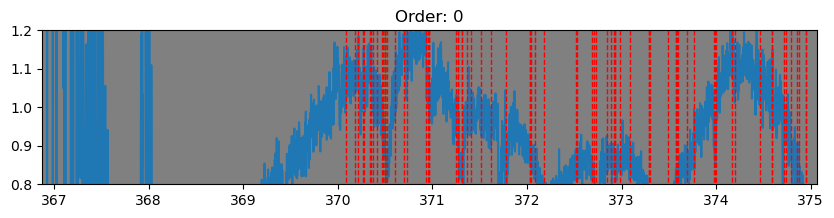

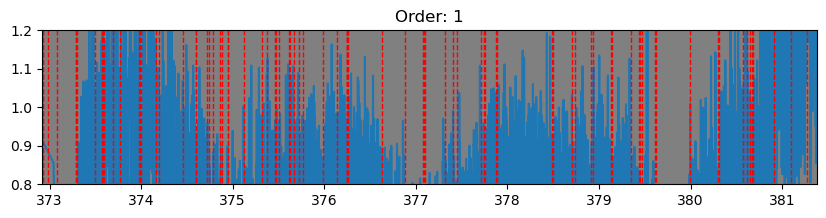

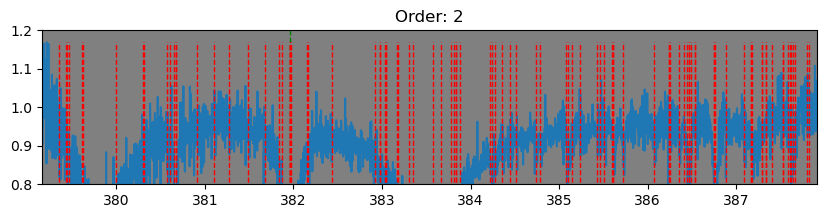

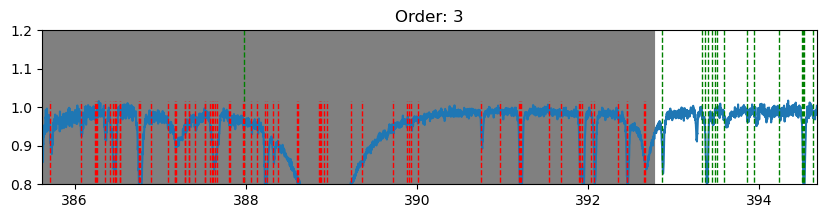

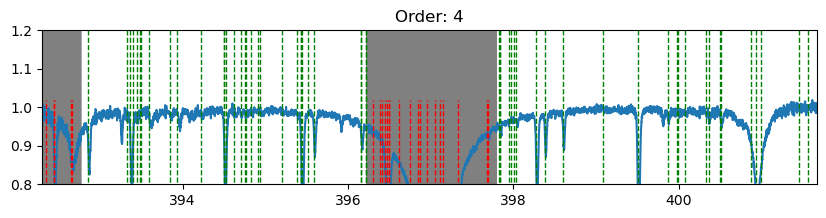

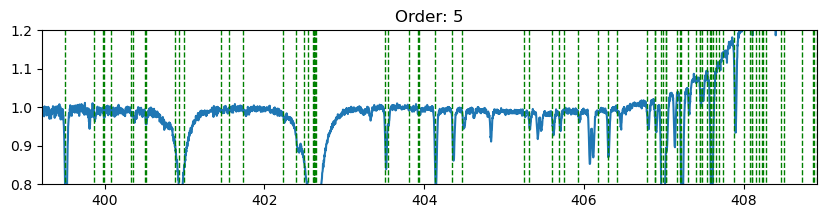

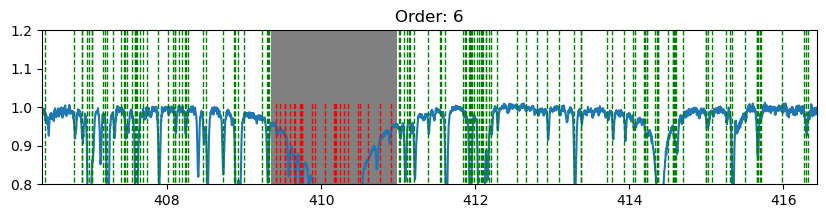

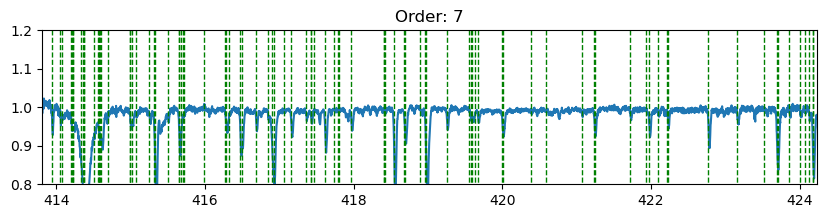

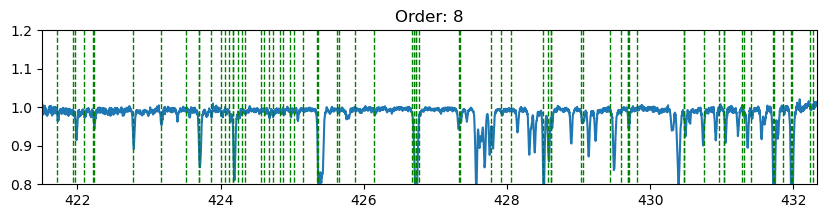

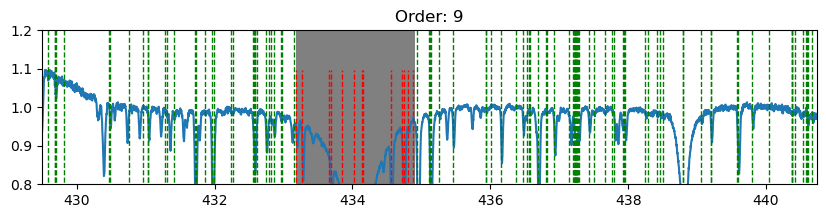

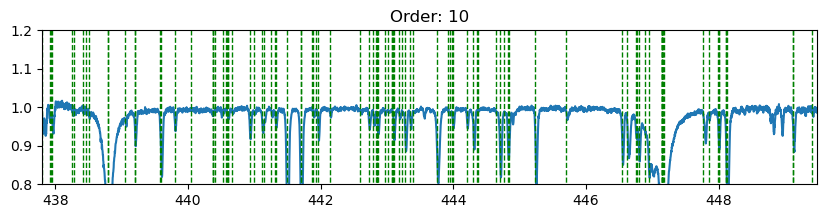

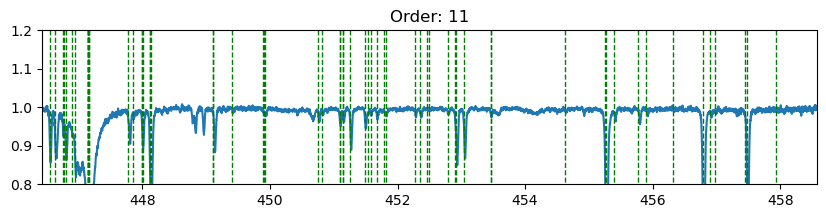

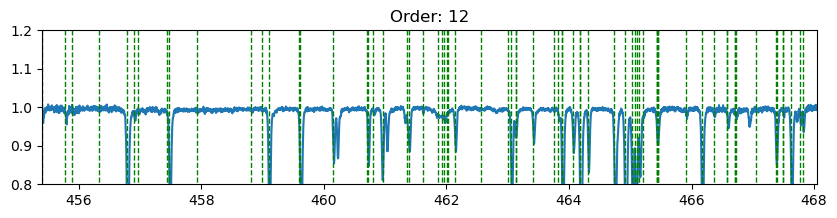

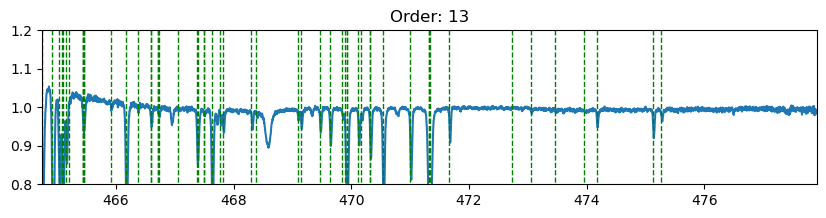

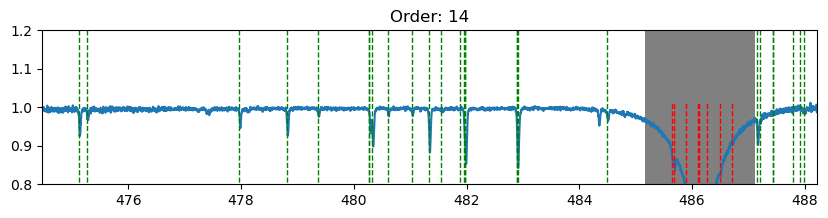

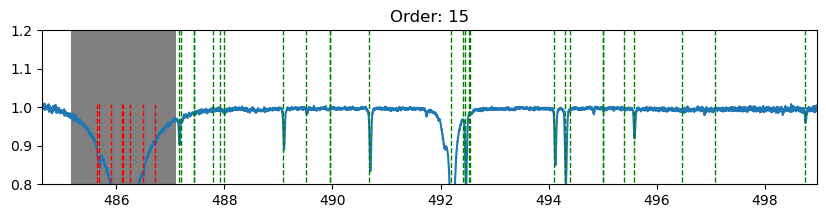

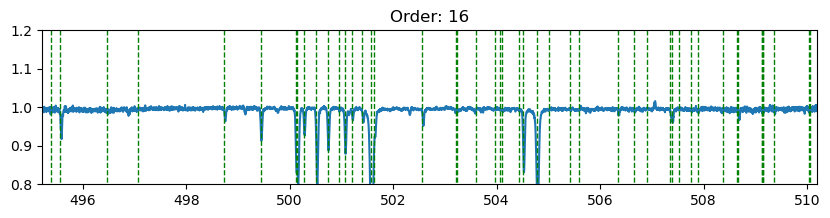

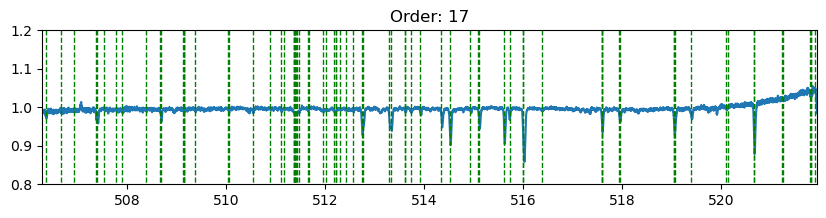

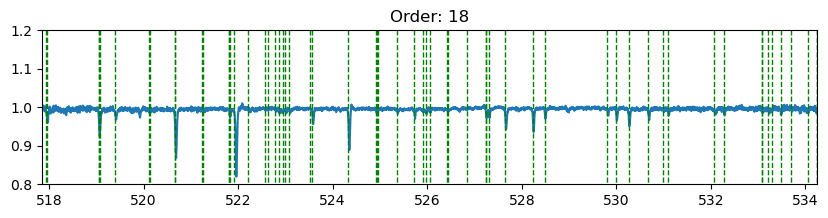

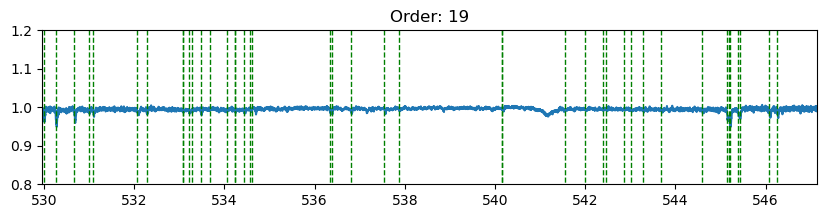

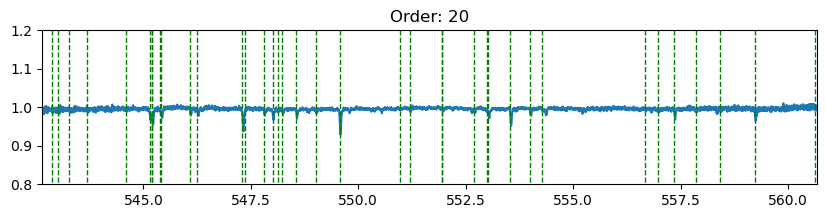

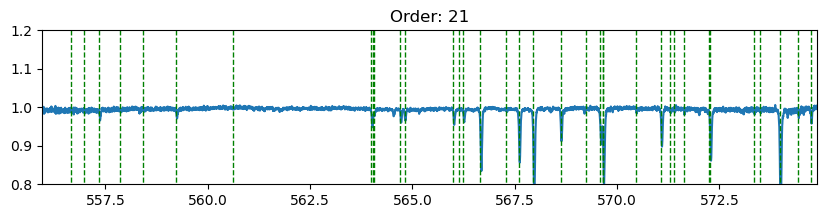

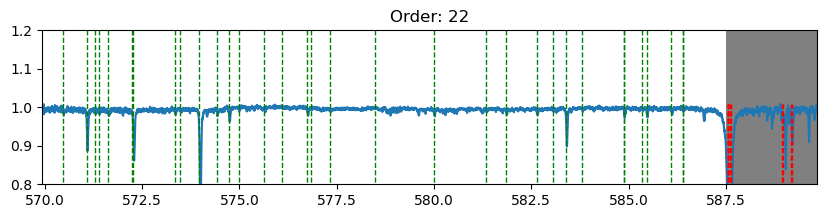

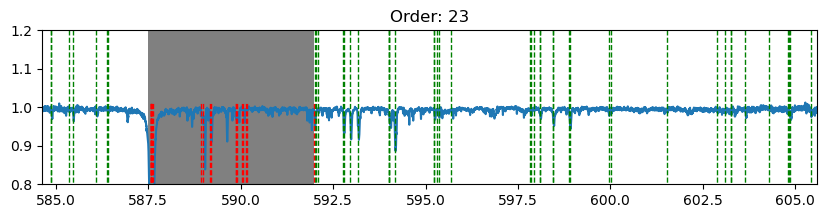

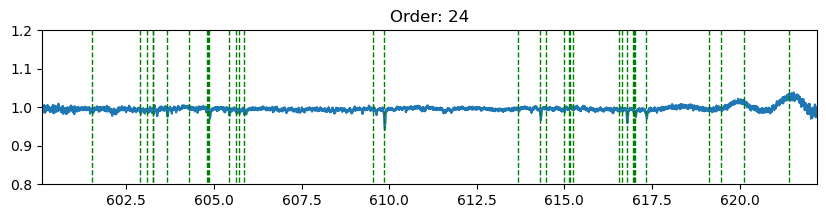

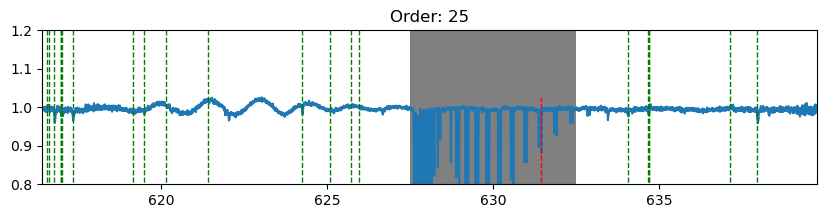

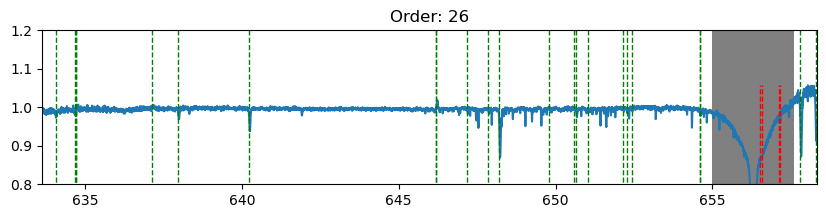

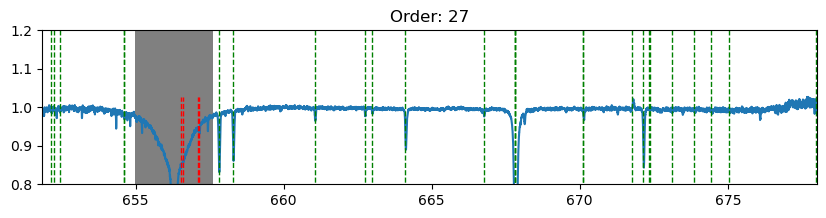

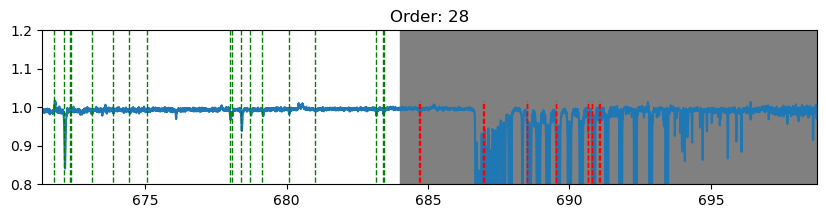

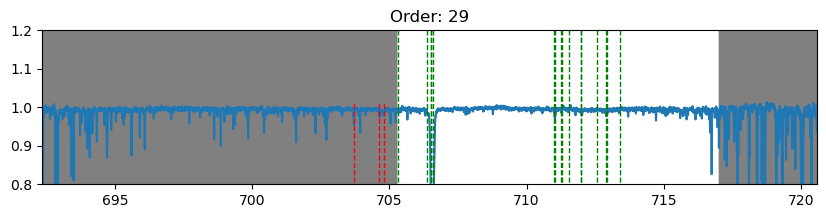

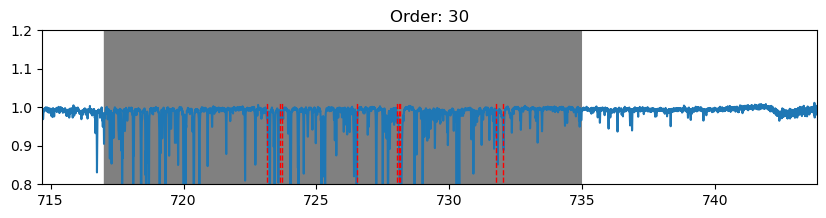

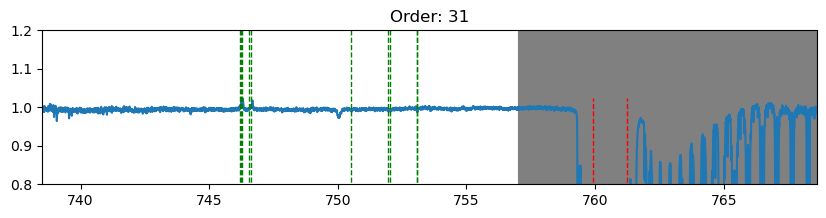

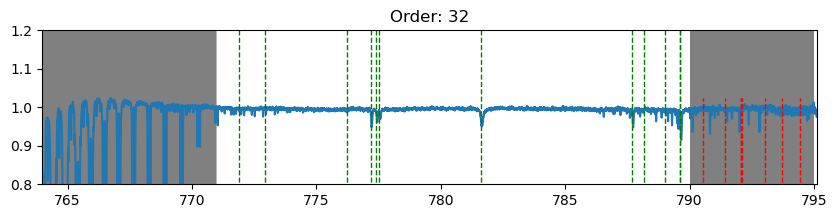

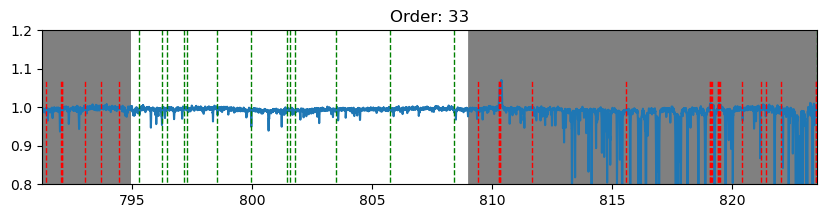

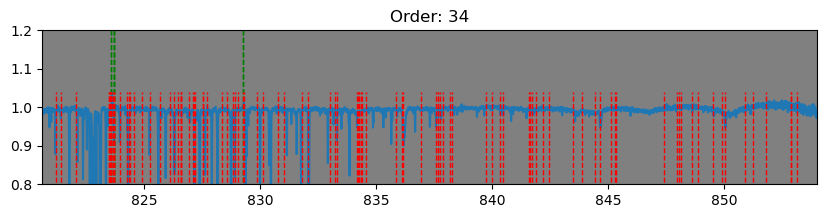

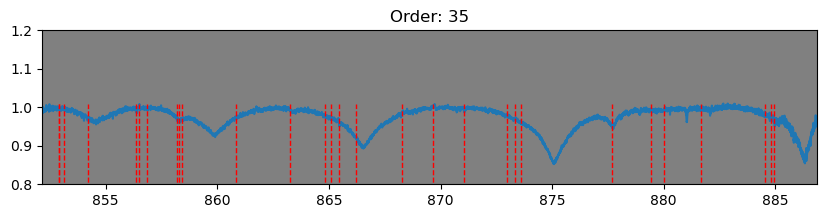

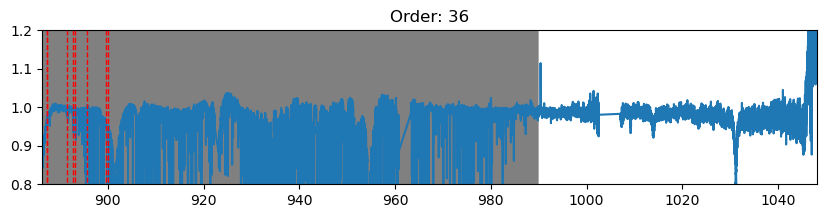

In [6]:
# for Spectrum and excluded regions visualization
spectrum = 'specpolFlow_tutorialfiles/hd46328_test_1.s'
pol.cleanMask.Excluded_Regions_Visual(spectrum, clean_mask, excluded_regions)   

In [7]:
print(clean_mask)

specpolFlow_tutorialfiles/test_output/hd46328_test_depth0.02_clean.mask
